### Student Information
Name: Najma Previa Jati

Student ID: 111006226

GitHub ID: viajati

---

### Instructions

### First Phase Submission

1. First: do the **take home** exercises in the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) that considered as **phase 1 (from exercise 1 to exercise 15)**. You can answer in the master file. __This part is worth 10% of your grade.__


2. Second: follow the same process from the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) on **the new dataset** up **until phase 1**. You can skip some exercises if you think some steps are not necessary. However main exercises should be completed. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 15% of your grade.__
    -  Use [the new dataset](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/newdataset/Reddit-stock-sentiment.csv). The dataset contains a 16 columns including 'text' and 'label', with the sentiment labels being: 1.0 is positive, 0.0 is neutral and -1.0 is negative. You can simplify the dataset and use only the columns that you think are necessary. 
    
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.
    - Use this file to complete the homework from the second part. Make sure the code can be run from the beginning till the end and has all the needed output.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 10% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    


4. Fourth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 5% of your grade.__

You can submit your homework following these guidelines: [DM2025-Lab1-announcement](https://github.com/leoson-wu/DM2025-Lab1-Announcement/blob/main/README.md). Make sure to commit and save your changes to your repository __BEFORE the deadline (September 28th 11:59 pm, Sunday)__. 

### Second Phase Submission 

**You can keep the answer for phase 1 for easier running and update the phase 2 on the same page.**

1. First: Continue doing the **take home** exercises in the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) for **phase 2, starting from Finding frequent patterns**. Use the same master(.ipynb) file. Answer from phase 1 will not be considered at this stage. You can answer in the master file. __This part is worth 10% of your grade.__


2. Second: Continue from first phase and do the same process from the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) on **the new dataset** for phase 2, starting from Finding frequent pattern. You can skip some exercises if you think some steps are not necessary. However main exercises should be completed. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 15% of your grade.__
    - Continue using this file to complete the homework from the second part. Make sure the code can be run from the beginning till the end and has all the needed output. Use the same new dataset as in phase 1.
    
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.

3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 20% of your grade.__
    - Use this file to answer.
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency).  Refer to this Scikit-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Note that for the TF-IDF features you might need to use other type of NB classifier different than the one in the Master Notebook. Comment on the differences and when using augmentation with feature pattern.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be handled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 5% of your grade.__


You can submit your homework following these guidelines: [DM2025-Lab1-announcement](https://github.com/leoson-wu/DM2025-Lab1-Announcement/blob/main/README.md). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 19th 11:59 pm, Sunday)__. 

# Phase 1

In [2]:
### Begin Assignment Here

import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
import nltk; nltk.download('punkt')

# load new dataset
df = pd.read_csv(
    r"C:\Users\user\Downloads\lab1\DM2025Labs\DM2025-Lab1-Exercise\newdataset\Reddit-stock-sentiment.csv"
)
# keep only what we need
X = df[['text','label']].copy()

# add readable label
label_map = {1.0:'positive', 0.0:'neutral', -1.0:'negative'}
X['label_name'] = X['label'].map(label_map)


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [3]:
# Exercise 1

# print first 3 documents 
for i in range(3):
    print(f"example {i+1}\n{X.loc[i,'text']}\n")

example 1
Calls on retards

example 2
Stunt as in like why did they even make a big deal about starting it in the first place? No company should ever talk about politics ever.

example 3
Seeing lots of red in the ticker.



In [4]:
# Exercise 2

# posts that mention "stock" or "market"
X[X['text'].str.contains(r"\bstock|market\b", case=False, na=False)].head(3)

# very short vs very long
X[X['text'].str.len()<200].head(3)
X[X['text'].str.len()>3000].head(2)

# has a $TICKER pattern like $AAPL
X[X['text'].str.contains(r"\$[A-Z]{2,5}", na=False)].head(5)

# has numbers (prices/dates)
X[X['text'].str.contains(r"\d", na=False)].head(5)


,text,label,label_name
3,Vision Marine Technologies Inc. is rewriting t...,1.0,positive
7,Confirmed not a trap. Its been like this for p...,0.0,neutral
8,Am I the only one seeing the cup & handle brea...,1.0,positive
9,HLGN is $10. Hurry and catch it now before it ...,1.0,positive
13,"\r\nI’ve been doing pretty good with this, but...",0.0,neutral


In [5]:
# Exercise 3

# take positive only, then every 10th, show first 5
X[X['label_name']=='positive'][::10].head(5)


,text,label,label_name
3,Vision Marine Technologies Inc. is rewriting t...,1.0,positive
78,I think it’s gonna work itself out. I bought t...,1.0,positive
168,The obvious can also be refreshing from CNBC: ...,1.0,positive
219,Same. Back to break even after that last rip b...,1.0,positive
319,Etrade has a feed of news articles about how r...,1.0,positive


In [7]:
# Exercise 4
# simple checker per row (axis=1)

def check_missing_values(x):
    return ("The amoung of missing records is: ", int(x.isnull().sum()))
print(X.isnull().apply(lambda row: check_missing_values(row), axis=1).head())


0    (The amoung of missing records is: , 0)
1    (The amoung of missing records is: , 0)
2    (The amoung of missing records is: , 0)
3    (The amoung of missing records is: , 0)
4    (The amoung of missing records is: , 0)
dtype: object


In [9]:
# Exercise 5
buggy_examples = [
    {"id": "A", "text": np.nan},      # real NaN
    {"id": "B"},                      # missing key → NaN
    {"id": "C", "text": "NaN"},       # string "NaN"
    {"id": "D", "text": "None"},      # string "None"
    {"id": "E", "text": None},        # real Python None
    {"id": "F", "text": ""}           # empty string
]

buggy_df = pd.DataFrame(buggy_examples, columns=["id", "text"])
display(buggy_df)

# check with isnull()
print(buggy_df["text"].isnull())


,id,text
0,A,NaN
1,B,NaN
2,C,NaN
3,D,None
4,E,None
5,F,


0     True
1     True
2    False
3    False
4     True
5    False
Name: text, dtype: bool


In [10]:
# Fix: replace the fake missing values with actual np.nan
buggy_df["text"] = buggy_df["text"].replace(["NaN", "None", ""], np.nan)

# now check again
print(buggy_df["text"].isnull())

0    True
1    True
2    True
3    True
4    True
5    True
Name: text, dtype: bool


C:\Users\user\AppData\Local\Temp\ipykernel_2068\2653504601.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  buggy_df["text"] = buggy_df["text"].replace(["NaN", "None", ""], np.nan)


What I observed is that .isnull() only works for actual np.nan or real Python None. It does not catch “fake” missing values like the string "NaN", the string "None", or an empty string '', because pandas treats those as ordinary text. That’s why some rows came back as False even though they look like missing values to us.

The fix is to explicitly replace those fake values with np.nan before running .isnull(). After doing this, pandas correctly recognizes all of them as missing.

In [16]:
# Exercise 6

df_sample = df.sample(n=100, random_state=42)

# If we type in these codes, we can see that df is the full dataset,
# while df_sample is the smaller 100-row dataset.

print("df has", len(df), "rows")
print("df_sample has", len(df_sample), "rows")

# df_sample is just a smaller portion of the data taken randomly
# from the bigger dataset. It’s used to work faster without 
# always needing the entire dataset.



df has 847 rows
df_sample has 100 rows


In [17]:
# If we take a look at the first few rows of each:
print(df.head())
print(df_sample.head())

# We can see that df starts at index 0, 1, 2, ...
# while df_sample might show random rows like 457, 342,...,
# because they were randomly pulled.

      type             datetime  post_id         subreddit  \
0  comment  2025-04-11 17:29:56  mmli62w    wallstreetbets   
1  comment   2025-04-12 1:12:19  mmnu7v9    wallstreetbets   
2  comment  2025-04-10 15:09:41  mmeevio       StockMarket   
3     post  2023-08-30 17:12:55  165kllm  stockstobuytoday   
4  comment  2025-04-11 14:48:05  mmkl6bw       StockMarket   

                                               title                author  \
0    Retardation is on the menu boys! WSB is so back          StickyTip420   
1  Retail giant TARGET has now declined for 10 co...  Comfortable-Dog-8437   
2  How do you feel about a sitting president maki...          Btankersly66   
3                              Who knows more? $VMAR             emiljenfn   
4  The Trump administration is begging Xi Jinping...          Just-Big6411   

                                                 url  upvotes  downvotes  \
0               https://i.redd.it/0yq2ftren8ue1.jpeg        0        NaN   
1     

In [18]:
# If we compare the indexes directly:
print("First 10 indexes of df:", df.index[:10].tolist())
print("First 10 indexes of df_sample:", df_sample.index[:10].tolist())

# We notice that df indexes are continuous,
# but df_sample indexes are scattered.

First 10 indexes of df: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
First 10 indexes of df_sample: [457, 342, 280, 275, 843, 734, 96, 662, 109, 655]


In [19]:
# Finally, if we look at them side-by-side using concat:
pd.concat([df.head(5), df_sample.head(5)], axis=1)

# We can see 5 rows of df on the left and 5 rows of df_sample
# on the right, which makes the differences very clear.

,type,datetime,post_id,subreddit,title,author,url,upvotes,downvotes,upvote_ratio,...,url,upvotes,downvotes,upvote_ratio,text,subjectivity,polarity,sentiment,entities,label
0,comment,2025-04-11 17:29:56,mmli62w,wallstreetbets,Retardation is on the menu boys! WSB is so back,StickyTip420,https://i.redd.it/0yq2ftren8ue1.jpeg,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,comment,2025-04-12 1:12:19,mmnu7v9,wallstreetbets,Retail giant TARGET has now declined for 10 co...,Comfortable-Dog-8437,https://i.redd.it/7tl6puv9waue1.jpeg,-15.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,comment,2025-04-10 15:09:41,mmeevio,StockMarket,How do you feel about a sitting president maki...,Btankersly66,https://apnews.com/article/trump-truth-social-...,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,post,2023-08-30 17:12:55,165kllm,stockstobuytoday,Who knows more? $VMAR,emiljenfn,https://www.reddit.com/r/stockstobuytoday/comm...,30.0,0.0,0.98,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,comment,2025-04-11 14:48:05,mmkl6bw,StockMarket,The Trump administration is begging Xi Jinping...,Just-Big6411,https://edition.cnn.com/2025/04/10/politics/tr...,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
457,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,https://i.redd.it/uajqu4kxl7ue1.png,1.0,NaN,NaN,"""We"" who?",0.000000,0.000000,0.0,[],0.0
342,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,https://i.redd.it/7tl6puv9waue1.jpeg,1.0,NaN,NaN,Chicken jockey,0.950000,-0.600000,-1.0,"['jockey', 'Chicken']",0.0
280,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,https://apnews.com/article/trump-truth-social-...,2.0,NaN,NaN,Not great Bob,0.750000,0.800000,1.0,['Bob'],-1.0
275,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,https://i.redd.it/7tl6puv9waue1.jpeg,1.0,NaN,NaN,"Speak for yourself, my wife is being harder on...",0.633333,0.633333,1.0,"['BBQ', 'potato', 'anime', 'wife', 'level', 'S...",0.0
843,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,https://i.redd.it/atvlo83gk4ue1.jpeg,2.0,NaN,NaN,Where can I read this?,0.000000,0.000000,0.0,[],0.0


label
 0.0    423
-1.0    315
 1.0    109
Name: count, dtype: int64


<Axes: title={'center': 'Sentiment distribution (Full dataset)'}, xlabel='label'>

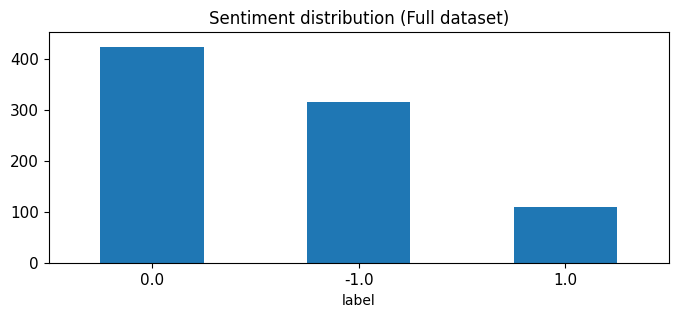

In [21]:
# Exercise 7

# We want to look at the distribution of sentiment labels in both the full dataset (df) and the sample (df_sample). 
# This will let us see if the sample is representative.

# First, we check the label distribution in the full dataset:
print(df['label'].value_counts())

# Plot bar chart for df (full dataset)
df['label'].value_counts().plot(
    kind='bar',
    title='Sentiment distribution (Full dataset)',
    ylim=[0, df['label'].value_counts().max() + 30],  # automated ylim
    rot=0, fontsize=11, figsize=(8,3)
)


label
-1.0    42
 0.0    40
 1.0    18
Name: count, dtype: int64


<Axes: title={'center': 'Sentiment distribution (Sample)'}, xlabel='label'>

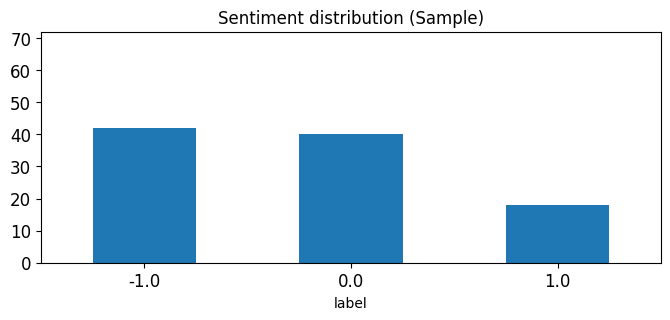

In [22]:
# Then, do the same for the sample:
print(df_sample['label'].value_counts())

df_sample['label'].value_counts().plot(
    kind='bar',
    title='Sentiment distribution (Sample)',
    ylim=[0, df_sample['label'].value_counts().max() + 30],  # automated ylim
    rot=0, fontsize=12, figsize=(8,3)
)


In the full dataset, we can see the overall counts of positive (1.0), neutral (0.0), and negative (-1.0). In the sample, the distribution should look similar but not identical, since it was randomly chosen. The key improvement is that we automated the ylim using .max() + 30, instead of hardcoding it. his makes the visualization adjust automatically if the dataset changes.

<Axes: title={'center': 'Sentiment distribution (Full vs Sample)'}, xlabel='label'>

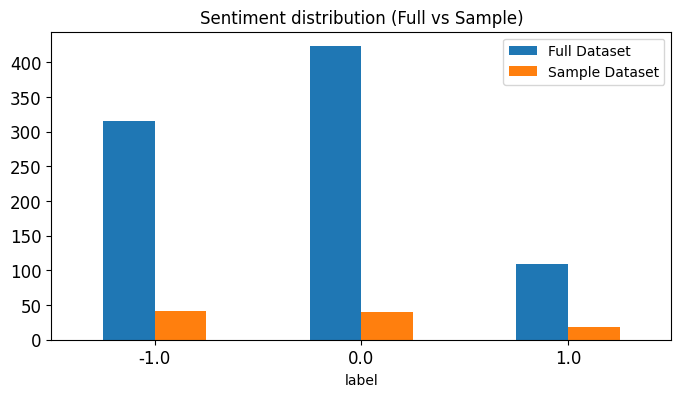

In [23]:
# Exercise 8 

# We want to do a side-by-side comparison of the distribution between the full dataset (df) and the sample (df_sample).

order = [-1.0, 0.0, 1.0]   # -1 = negative, 0 = neutral, 1 = positive

# Create a comparison DataFrame with both distributions
compare_df = pd.DataFrame({
    'Full Dataset': df['label'].value_counts(),
    'Sample Dataset': df_sample['label'].value_counts()
}).reindex(order)

# Plot them side by side
compare_df.plot(
    kind='bar',
    title='Sentiment distribution (Full vs Sample)',
    rot=0, fontsize=12, figsize=(8,4)
)

In [25]:
# Exercise 9

import nltk
nltk.download("punkt")

# Tokenize each text into unigrams (single words)
# This means we split each sentence into smaller units (words, emails, etc.)
df['unigrams'] = df['text'].apply(lambda x: nltk.word_tokenize(str(x)))

# Show first 4 rows with unigrams added
df[["text", "unigrams"]].head(4)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,text,unigrams
0,Calls on retards,"[Calls, on, retards]"
1,Stunt as in like why did they even make a big ...,"[Stunt, as, in, like, why, did, they, even, ma..."
2,Seeing lots of red in the ticker.,"[Seeing, lots, of, red, in, the, ticker, .]"
3,Vision Marine Technologies Inc. is rewriting t...,"[Vision, Marine, Technologies, Inc., is, rewri..."


In [27]:
from sklearn.feature_extraction.text import CountVectorizer

# make a vectorizer
count_vect = CountVectorizer()

# get the analyzer function so we can run it on any string
analyze = count_vect.build_analyzer()

In [28]:
first_idx = df['text'].first_valid_index()

tokens = analyze(str(df.loc[first_idx, 'text']))

# print tokens + how many we got 
print(tokens)
print("token count:", len(tokens))

['calls', 'on', 'retards']
token count: 3


In [29]:
analyze(df["text".iloc[0])

['calls', 'on', 'retards']

In [33]:
X_counts = count_vect.fit_transform(df['text'].astype(str))

In [34]:
# Exercise 10

# First check the shape of the term-document matrix
print(X_counts.shape)


(847, 4346)


In [35]:
# look at first 5 docs against first 100 terms (dense slice)
print(X_counts[0:5, 0:100].toarray())

[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 

In [36]:
# Get vocabulary (all terms)
feature_names = count_vect.get_feature_names_out()

In [38]:
row_idx = 4

# Step 6: Find which columns in this row are nonzero (the words that appear)
nonzero_indices = X_counts[row_idx].nonzero()[1]

# Step 7: Map those column indices back to actual words
words_in_row5 = [feature_names[i] for i in nonzero_indices]

print("Words in row 5:", words_in_row5)

Words in row 5: ['he', 'didn', 'say', 'thank', 'you']


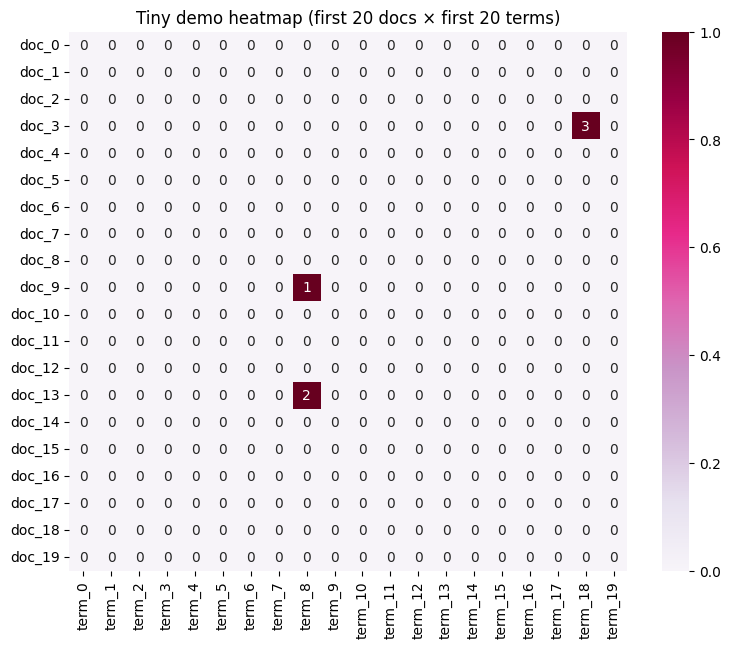

In [39]:
# Exercise 11 

# Part A: Tiny demo heatmap (first 20 docs × first 20 terms) 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# We reuse the fitted vectorizer + matrix from Exercise 10:
# count_vect: has the learned vocabulary
# X_counts: sparse matrix (rows = docs, cols = terms, values = counts)

# we the first 20 feature names (terms) just for a small, readable demo
terms_20 = count_vect.get_feature_names_out()[0:20]

plot_x = [f"term_{i}" for i in range(20)]

docs_20_idx = list(df.index)[0:20]
plot_y = [f"doc_{i}" for i in docs_20_idx]

# we slice the sparse matrix: first 20 docs × first 20 terms, then convert to dense array
plot_z = X_counts[0:20, 0:20].toarray()

# we put it into a DataFrame so seaborn can draw it easily
df_todraw = pd.DataFrame(plot_z, columns=plot_x, index=plot_y)

# we then draw the tiny heatmap 
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw, cmap="PuRd", vmin=0, vmax=1, annot=True)
ax.set_title("Tiny demo heatmap (first 20 docs × first 20 terms)")
plt.show()

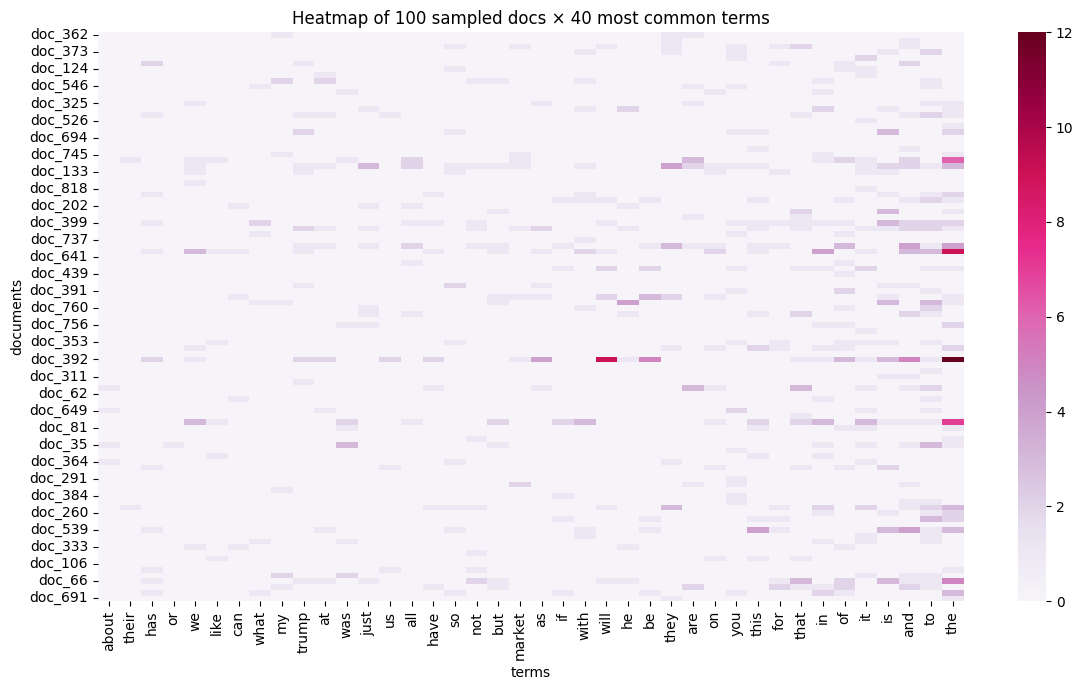

In [40]:
# Part B: Practical heatmap (sample docs × most-common terms)

# Plotting the FULL matrix is not helpful (too big + mostly zeros).
# Strategy:
#   - pick M random documents
#   - pick K most frequent terms (across the whole corpus)
#   - slice to M×K and plot
# This keeps it readable + fast, but still informative.

import numpy as np

M = 100  # how many documents to sample
K = 40   # how many top terms to keep

# we andomly choose M row indices from our matrix
rng = np.random.default_rng(42)
doc_idx = rng.choice(X_counts.shape[0], size=min(M, X_counts.shape[0]), replace=False)

# we find the top-K terms by total frequency 
term_totals = np.asarray(X_counts.sum(axis=0)).ravel()  
top_term_idx = np.argsort(term_totals)[-K:]             

# we then slice the sparse matrix (docs × top terms) and convert to dense
sub = X_counts[doc_idx][:, top_term_idx].toarray()

# build readable labels
feature_names = count_vect.get_feature_names_out()
top_terms = [feature_names[j] for j in top_term_idx]
doc_labels = [f"doc_{i}" for i in doc_idx]

# put into a DataFrame for seaborn
df_sub = pd.DataFrame(sub, index=doc_labels, columns=top_terms)

# draw the heatmap 
plt.figure(figsize=(12, 7))
ax = sns.heatmap(df_sub, cmap="PuRd")
ax.set_title(f"Heatmap of {len(doc_idx)} sampled docs × {len(top_terms)} most common terms")
ax.set_xlabel("terms")
ax.set_ylabel("documents")
plt.tight_layout()
plt.show()


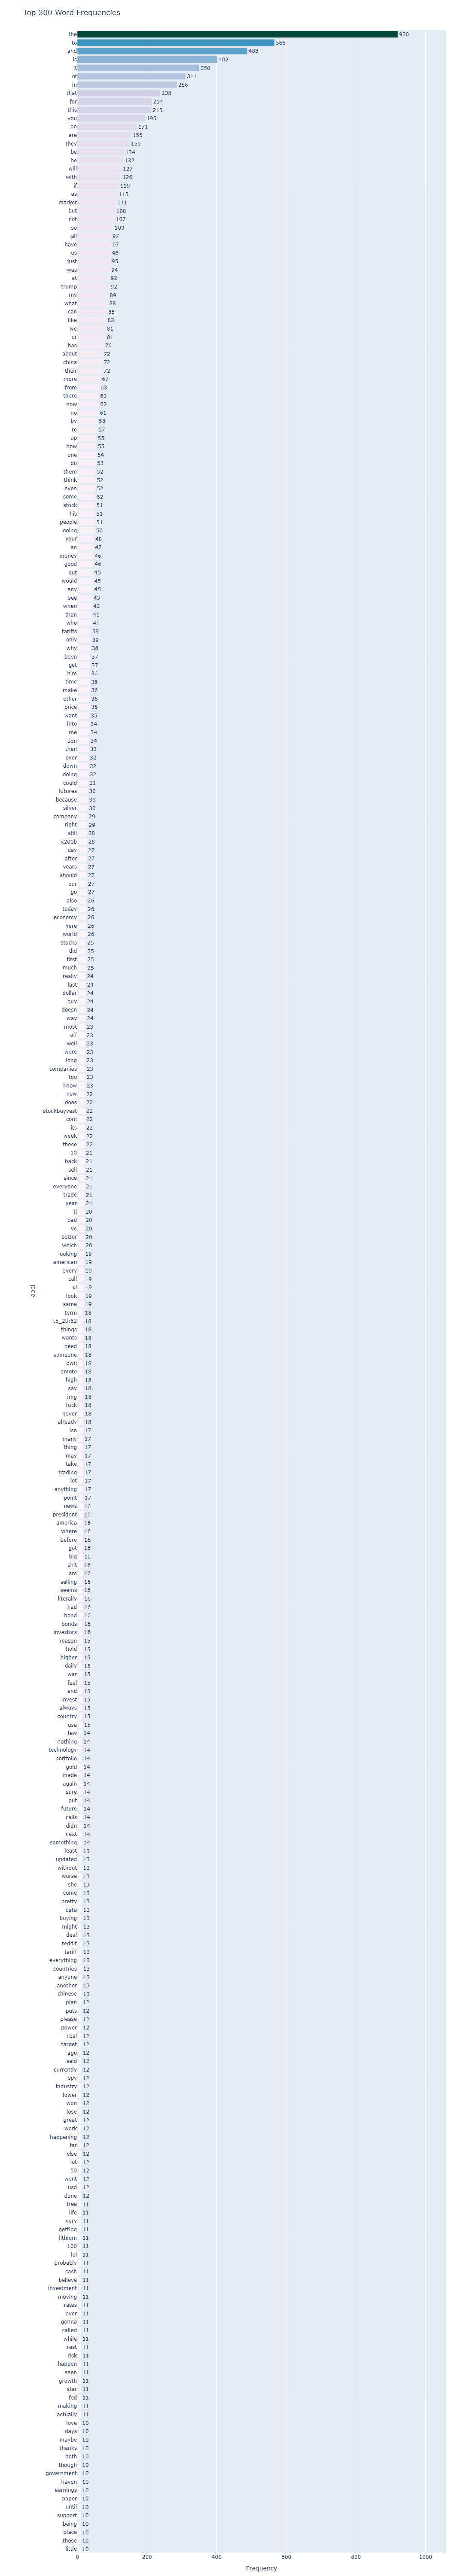

In [41]:
# Exercise 12

import numpy as np
import pandas as pd
import plotly.express as px

# compute term frequencies (how often each word appears across all texts)
term_frequencies = np.asarray(X_counts.sum(axis=0)).ravel()

# get all the terms (the words in the vocabulary)
terms = count_vect.get_feature_names_out()

# put them into a DataFrame for easier handling
freq_df = (
    pd.DataFrame({"term": terms, "frequency": term_frequencies})
      .sort_values("frequency", ascending=False)  # sort by frequency (most common words first)
      .head(300)                                  # only keep the top 300 words (otherwise too messy)
      .reset_index(drop=True)
)

# shorten very long words so labels don’t overlap in the chart
def short(s, n=28): 
    return s if len(s) <= n else s[:n-1] + "…"
freq_df["label"] = freq_df["term"].map(short)

# lock the y-axis order so the most frequent term shows at the top
order = freq_df["label"].tolist()[::-1]  

# make the bar chart with Plotly
fig = px.bar(
    freq_df,
    y="label", 
    x="frequency",
    orientation="h",                 
    text="frequency",                
    color="frequency",               
    color_continuous_scale="PuBuGn", 
    title="Top 300 Word Frequencies"
)

# adjust details of the chart to make it clearer
fig.update_traces(
    textposition="outside",
    cliponaxis=False,
    customdata=freq_df["term"],      # hover shows the full word if shortened
    hovertemplate="<b>%{customdata}</b><br>count=%{x}<extra></extra>"
)

pad = freq_df["frequency"].iloc[0] * 0.15
fig.update_layout(
    yaxis=dict(
        categoryorder="array",
        categoryarray=order,
        automargin=True
    ),
    xaxis=dict(range=[0, freq_df["frequency"].max() + pad], title="Frequency"),
    margin=dict(l=180, r=40, t=70, b=40),
    height=max(1400, int(len(freq_df)*20))
)

fig.update_coloraxes(showscale=False)
fig.show()


In this step, I wanted to see which words show up most often in the dataset. To do this, I first summed across the whole term-document matrix to count how many times each word appears. Since the dataset has too many words, I only kept the top 300 most frequent ones to make the chart readable. I also switched the chart to a horizontal bar chart so the word labels don’t overlap. Long words were shortened in the chart, but I kept the full words available on hover. Finally, I used colors to show differences in frequency. This makes it easy to quickly see which words dominate in the dataset, without the chart getting messy.

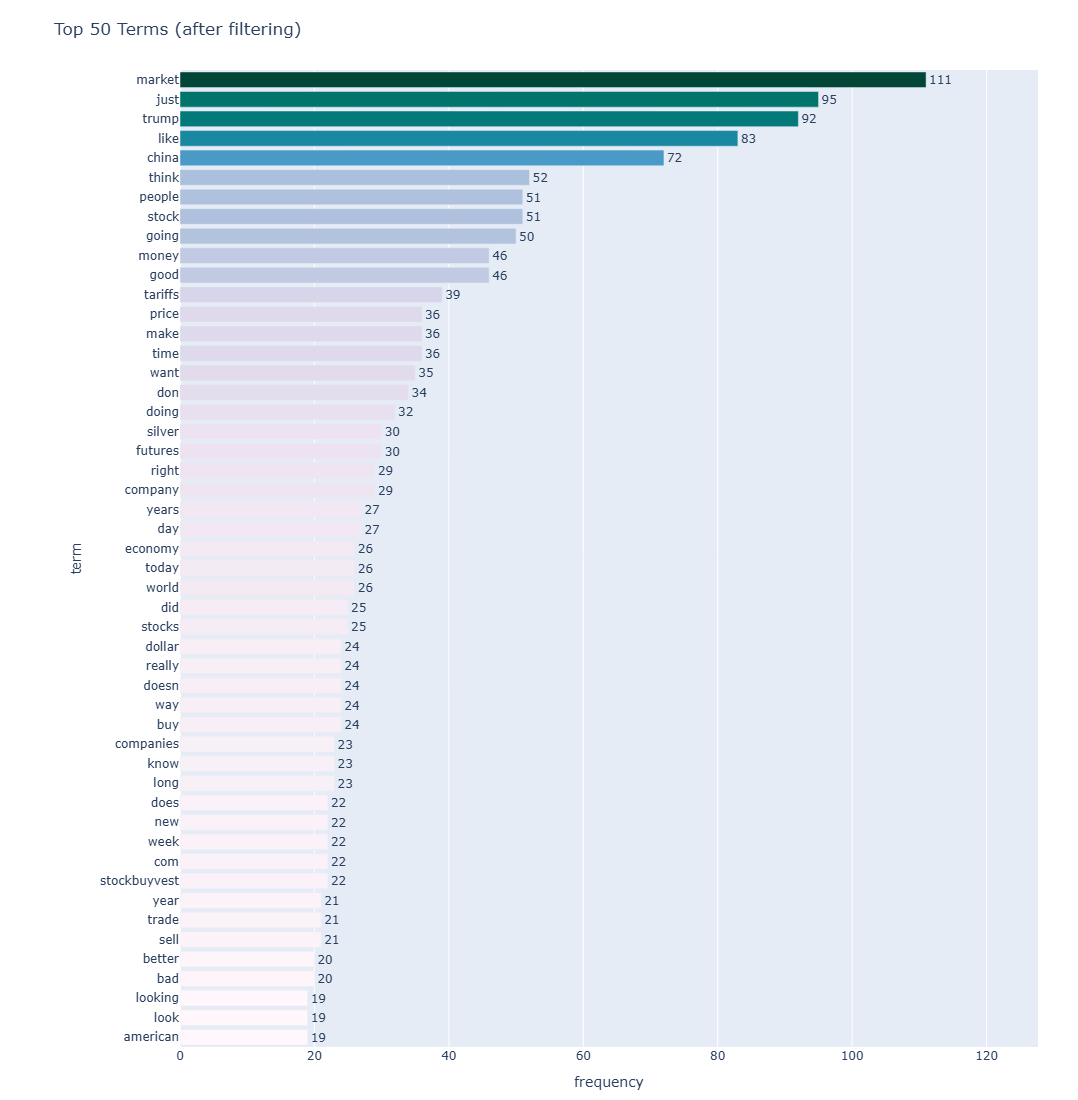

In [43]:
# Exercise 13
# Reduce the vocabulary before plotting 

import numpy as np
import pandas as pd
import plotly.express as px
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

# Plotting “everything” is slow + messy so its better to filter the vocabulary to keep only useful tokens.

# small knobs to be able to tweak control
TOP_N   = 50   # show only the top 50 most informative terms
MIN_DF  = 5    # a term must appear in at least 5 documents
MIN_LEN = 3    # ignore super short tokens (e.g., "a", "I")
MAX_LEN = 20   # ignore overly long tokens (likely noise)

# compute term stats: total frequency (tf) and document frequency (df)
terms = count_vect.get_feature_names_out()
tf = np.asarray(X_counts.sum(axis=0)).ravel()      
dfreq = (X_counts > 0).sum(axis=0).A1              

freqs = pd.DataFrame({"term": terms, "tf": tf, "df": dfreq})

# filter out junk: stopwords, too short/long, numeric, path-like stuff, etc.
stop = set(ENGLISH_STOP_WORDS)

def is_valid_term(t):
    # keep normal-looking words only
    if not (MIN_LEN <= len(t) <= MAX_LEN):   # drop too short/long
        return False
    if t in stop:                            # drop stopwords like "the", "and"
        return False
    if any(ch in t for ch in "@/#\\|"):      # drop emails/paths/tickers with slashes
        return False
    if t.isnumeric():                        # drop pure numbers
        return False
    return t.isalpha()                       # keep only alphabetic tokens (no punctuation)

freqs = freqs[freqs["term"].map(is_valid_term)]   
freqs = freqs[freqs["df"] >= MIN_DF]              

# pick the top N by total frequency (after filtering)
top = freqs.sort_values("tf", ascending=False).head(TOP_N).copy()

# shorten long labels so bars don’t overlap (full term still shown on hover)
def short_label(s, n=28):
    return s if len(s) <= n else s[:n-1] + "…"

top["label"] = top["term"].map(short_label)

# make a clean horizontal bar chart
order = top["label"].tolist()[::-1]  # reverse so the biggest bar shows at the top

fig = px.bar(
    top,
    y="label",
    x="tf",
    orientation="h",                       
    text="tf",                             
    color="tf",                            
    color_continuous_scale="PuBuGn",
    title=f"Top {TOP_N} Terms (after filtering)"
)

# pretty hover + spacing
fig.update_traces(
    textposition="outside",
    cliponaxis=False,
    customdata=top["term"],
    hovertemplate="<b>%{customdata}</b><br>count=%{x}<extra></extra>"
)

pad = max(1, top["tf"].iloc[0] * 0.15)
fig.update_layout(
    yaxis=dict(categoryorder="array", categoryarray=order, automargin=True, title="term"),
    xaxis=dict(range=[0, top["tf"].max() + pad], title="frequency"),
    margin=dict(l=180, r=40, t=70, b=40),
    height=max(650, int(len(top) * 22))
)

fig.update_coloraxes(showscale=False)
fig.show()


I first computed tf and df for every word (how often it appears, and in how many docs).Then filtered out unhelpful tokens (stopwords, super short/long, numeric, weird symbols, too rare). From the cleaned list, I picked the Top 50 by total frequency and plotted them. The result is an uncluttered, faster chart that focuses on words that actually carry information in your new dataset.

# Phase 2

In [ ]:
### Begin Assignment Here